<a href="https://colab.research.google.com/github/boramkim0514/KOIPA_AI/blob/main/D36_8_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미분(기울기)
* 한 순간(매우 작은 변화) 변화량(기울기) 구하는 것 ex) 0.1-0.5 초 일때 변화량


$$\frac{ df(x) }{ dx }  = \lim_{h\to 0} \frac{f(x+h) - f(x)}{ h }$$

In [ ]:
import numpy as np

# 수치 미분

# 미분의 나쁜 구현
def numerical_diff(f, x): # f 미분 대상 함수, x인 순간의 기울기 구하기 위함)
    '''
    f : 미분 대상함수
    x : x인 순간의 기울기를 구하기 위함
    '''

    # 순간을 구하기 위해서 h를 0으로 설정하는 것 아닌, 0에 아주 가까운 숫자로 지정
    # 1. 분모에 0이 올 수 없음
    # 2. 변화량 구하는 것이기 때문에 0은 아님

    h = 10e-50 
    return (f(x+h) - f(x)) / h


너무 작은 숫자 나눗셈의 경우, 컴퓨팅 시스템상 부동 소수점 오류 발생(반올림 오차)


In [ ]:
np.float32(10e-50)

0.0

In [ ]:
1 / np.float32(10e-50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

# 전방차분과 중앙차분을 이용한 미분

$$
\frac{ df(x) }{ dx }  = \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ 2h }
$$

In [ ]:
# 향상된 미분 함수 구현
def numerical_diff(f, x):
    h = 1e-4 #0.0001이 제일 적당
    return (f(x+h)- f(x-h)) / (2*h)

**수치미분**
실제 $x$ 를 집어 넣고 미분을 계산하는 것 


# 수치미분의 예시
$$
f(x) = y = 0.01x^2 + 0.1x
$$

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

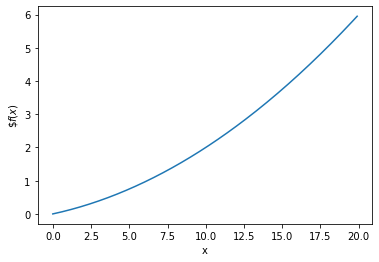

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel(f"x")
plt.ylabel(f"$\$f(x)$")
plt.plot(x, y)
plt.show()

In [ ]:
print("x가 5일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 5)))
print("x가 10일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 10)))

x가 5일 때의 미분값 : 0.2
x가 10일 때의 미분값 : 0.3


In [ ]:
# 미분값을 이용한 접선의 시각화
# 코드가 기니 보기로만 

In [ ]:
print("1 {:.3f}".format(numerical_diff(function_1, 5)))

1 0.200


# 편미분
* 2개 이상의 인수($x$)에 대한 미분
* 여러개 인수 중 하나만 미분 하는 것


$$
f(x_0, x_1) = x^2_0 + x^2_1
$$

In [ ]:
#인수, 변수 같은 개념

# x :  배열
def function_2(x):
    return x[0]**2 + x[1]** 2
    #return np.sum(x**2)

## 문제 2 
$x_0=3, x_1=4$ 일 때 $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하시오. `답 : 약 6.0

In [ ]:
#편미분 코딩 구현 

def function_tmp1(x0):
    #return f(x)[0]**2 + f(x)[1]**2
    return x0**2 + 4.0**2

In [ ]:
print("x0가 3, x1=4 일 때의 미분값 : {:.1f}".format(numerical_diff(function_tmp1, 3.0)))

x0가 3, x1=4 일 때의 미분값 : 6.0


In [ ]:
x = np.arange(0.0, 20.0, 0.1)
x.shape

(200,)

## 문제 2
$x_0=3, x_1=4$ 일 때 $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$를 구하시오. `답 : 약 8.0`

일반적으로 상수 대입을 먼저 하고 미분을 한다

In [ ]:
# 편미분 

def function_tmp2(x1):
    return 3.00 ** 2 + x1 ** 2
print("x0가 3, x1=4 일 때의 미분값 : {:.1f}".format(numerical_diff(function_tmp2, 4.0)))

x0가 3, x1=4 일 때의 미분값 : 8.0


# 기울기( gradient) 
$x_0$에 대한 기울기와 $x_1의 기울기를 따로 구해서 확인했으나, 

* 각 방향의( $x_0$, $x_1$ ) 기울기를 하나로 묶어서 벡터화(1차원 배열화) 시킨다.

* 즉 우리는 $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$를 구할 것이다.


In [ ]:
#이해야할 코드 vs 구현해야할 코드 
#이건 연습 x, 함수 의미/원리 파악만

def numerical_gradient(f, x): #x(에 각각의 좌표가 들어옴)
    h = 1e-4
    #(기울기 배열의 모양은 x의 모양으로 들어옴)
    grad = np.zeros_like(x) #x와 shape이 같은 0으로 채워진 배열을 만든다.

## x 가 일차원 배열이라 가정할 때
    
    for idx in range(x.size):
        #각 x에 대한 편미분(2개 이상의 인수에 대한 미분) 수행
        tmp_val = x[idx] # x0 x1 같은 것임

        # f(x+h) 계산
        x[idx] = tmp_val + h # 목표로 하고 있는 x의 변화량을 구하기 위함
        fxh1 = f(x) #변화량 준 (tmp_val+ h) x에 대한 전방차분 구하기
        
        # f(x-h) 계산 
        x[idx] = tmp_val - h #후방차분
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2) / (2*h) #미분 수행 () 괄호 꼭 칠것 아니면 결과값이 이상하게 나옴
        x[idx] = tmp_val # 원래 값으로 복원 
    return grad 

In [ ]:
x = np.array([3.0, 4.0])
print ("x = [3, 4]일때 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([1.0, 2.0])
print ("x = [1, 2]일때 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = [3, 4]일때 기울기 배열 : [6. 8.]
x = [1, 2]일때 기울기 배열 : [2. 4.]


In [ ]:
x

array([1., 2.])

# 기울기(gradient)

- 최소 지점으로 가기 위한 $x_0$의 방향과 크기, 최소지점으로 가기 위한 $x_1의 방향과 크기
- 기울기가 가리키는 쪽은 각 장소에서 함수 출력의 결과값이 가장 작은 곳




* 화살표의 길이 기울기(변화량)가 크다 
* 방향은 최소 지점을 향한다

# 경사 하강법(경사법)(Gradient Descent)

- 데이터의 차원이 달라서 그래프가 복잡해짐


# 경사하강법의 원리
* 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
    - 갱신되는 위치(좌표)가 일정한게 아니라, 미분 값을 보고 갱신해야 할 수치를 일정하게 **조정** 
    - 합습률( *learning rate* $\eta$** )
* 이동한 곳에서도 미분을 통해 기울기 구하고, 기울기 구한 방향으로 이동
*최소점을 찾는 지점까지 반복(step)


### 경사 하강법 구현

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100 ): # 초기 x 지점
    x = init_x

    for i in range(step_num): 
        #1 . 미분을 통해 기울기 배열 구하기
        grads =numerical_gradient(f, x) # x의 변화량 분에 기울기 변화
        print("좌표 : {} /  기울기 : {}".format(x, grads)) #현 위치의 기울기 같이 보겠다
        
        #2. 경사하강법 공식을 이용한 좌표 갱신 
        x = x - lr*grads

    #최종 갱신된 좌표 나옴
    return x 


In [ ]:
def function_2(x):
    return np.sum(x**2)

In [ ]:
start_x = np.array([-3.0, 4.0])
gradient_descent(function_2, start_x, lr=0.1)

좌표 : [-3.  4.] /  기울기 : [-6.  8.]
좌표 : [-2.4  3.2] /  기울기 : [-4.8  6.4]
좌표 : [-1.92  2.56] /  기울기 : [-3.84  5.12]
좌표 : [-1.536  2.048] /  기울기 : [-3.072  4.096]
좌표 : [-1.2288  1.6384] /  기울기 : [-2.4576  3.2768]
좌표 : [-0.98304  1.31072] /  기울기 : [-1.96608  2.62144]
좌표 : [-0.786432  1.048576] /  기울기 : [-1.572864  2.097152]
좌표 : [-0.6291456  0.8388608] /  기울기 : [-1.2582912  1.6777216]
좌표 : [-0.50331648  0.67108864] /  기울기 : [-1.00663296  1.34217728]
좌표 : [-0.40265318  0.53687091] /  기울기 : [-0.80530637  1.07374182]
좌표 : [-0.32212255  0.42949673] /  기울기 : [-0.64424509  0.85899346]
좌표 : [-0.25769804  0.34359738] /  기울기 : [-0.51539608  0.68719477]
좌표 : [-0.20615843  0.27487791] /  기울기 : [-0.41231686  0.54975581]
좌표 : [-0.16492674  0.21990233] /  기울기 : [-0.32985349  0.43980465]
좌표 : [-0.1319414   0.17592186] /  기울기 : [-0.26388279  0.35184372]
좌표 : [-0.10555312  0.14073749] /  기울기 : [-0.21110623  0.28147498]
좌표 : [-0.08444249  0.11258999] /  기울기 : [-0.16888499  0.22517998]
좌표 : [-0.06755399  0.0

array([-6.11110793e-10,  8.14814391e-10])

** 학습률(Learning Rate)이 너무 크거나 작으면?






In [ ]:
#학습률이 너무 클 때, lr=10.0

start_x = np.array([-3.0, 4.0])
result = gradient_descent(function_2, start_x, lr=10.0)
print("LR: {}".format(result))

좌표 : [-3.  4.] /  기울기 : [-6.  8.]
좌표 : [ 57. -76.] /  기울기 : [ 114.         -152.00000001]
좌표 : [-1083.00000003  1444.00000007] /  기울기 : [-2165.99999927  2888.00000213]
좌표 : [ 20576.99999267 -27436.00002124] /  기울기 : [ 41154.00075912 -54872.00021744]
좌표 : [-390963.00759858  521284.00215314] /  기울기 : [-781925.96435547 1042568.05419922]
좌표 : [ 7428296.63595611 -9904396.53983905] /  기울기 : [ 14856562.5 -19808750. ]
좌표 : [-1.41137328e+08  1.88183103e+08] /  기울기 : [-2.8224e+08  3.7632e+08]
좌표 : [ 2.68126267e+09 -3.57501690e+09] /  기울기 : [ 5.36576e+09 -7.14752e+09]
좌표 : [-5.09763373e+10  6.79001831e+10] /  기울기 : [-9.9614720e+10  1.3631488e+11]
좌표 : [ 9.45170863e+11 -1.29524862e+12] /  기울기 : [2.68435456e+12 0.00000000e+00]
좌표 : [-2.58983747e+13 -1.29524862e+12] /  기울기 : [0. 0.]
좌표 : [-2.58983747e+13 -1.29524862e+12] /  기울기 : [0. 0.]
좌표 : [-2.58983747e+13 -1.29524862e+12] /  기울기 : [0. 0.]
좌표 : [-2.58983747e+13 -1.29524862e+12] /  기울기 : [0. 0.]
좌표 : [-2.58983747e+13 -1.29524862e+12] /  기울기 : [0. 

기울기가 너무 크면 발산

In [ ]:
# 학습률이 너무 작은 예
start_x = np.array([-3.0, 4.0])
result = gradient_descent(function_2, start_x, lr=1e-10)
print("Learning Rate 1e-10 : {}".format(result))

좌표 : [-3.  4.] /  기울기 : [-6.  8.]
좌표 : [-3.  4.] /  기울기 : [-6.  8.]
좌표 : [-3.  4.] /  기울기 : [-6.  8.]
좌표 : [-3.  4.] /  기울기 : [-6.  8.]
좌표 : [-3.  4.] /  기울기 : [-6.          7.99999999]
좌표 : [-3.  4.] /  기울기 : [-5.99999999  7.99999999]
좌표 : [-3.  4.] /  기울기 : [-5.99999999  7.99999999]
좌표 : [-3.          3.99999999] /  기울기 : [-5.99999999  7.99999999]
좌표 : [-3.          3.99999999] /  기울기 : [-5.99999999  7.99999999]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999999  7.99999999]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999999  7.99999998]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999999  7.99999998]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999999  7.99999998]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999998  7.99999998]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999998  7.99999998]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999998  7.99999998]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999998  7.99999997]
좌표 : [-2.99999999  3.99999999] /  기울기 : [-5.99999998  

기울기가 너무 작으면 최소지점으로 가지 못하고 갱신이 끝난다

# 신경망에서의 Gradeint Descent
손실값(loss)를 최소로 하는 모델 파라미터 구하는 과정
**최적화(optimization)**
* 신경망에서의 모델 파라미터는?
    * **가중치(W)와 편향(b)에 의해 성능이 바뀜
* Loss를 최소화 하기 위한 가중치와 편향을 구하는 과정을 최적화하는 함수(optimizer)
* 경사하강법은 여러 최적화 기법의 일종

**신경망의 학습**
Loss 값을 최소화 시키는 가중치와 편향을 구한다

미분은 어떻게 쓰이나?


에타 w Loss에 대한 기울기

In [ ]:
# 실습에 필요한 함수들
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        it.iternext()   
    return grad

# Simple Net 만들기
* 입력을 두개 받는 [x1, x_2] 3개의 뉴런을 가진 신경망
* 편향 고려x, 가중치만 사용



In [ ]:
# 신경망 클래스

class SimpleNet:
   
    # 초기화에서는?
    # 신경망이 초기에 가지고 있어야 할 매개변수를 세팅
    # 신경망 매개변수 초기화 작업을 생성자인 __init__ 메소드에서 수행

    def __init__(self):
        # 1) 정규분포 랜덤 * 0.01 기본으로 사용
        # 2) 카이밍 히 초기값 (He 초기값) - ReLU Activation Function으로 사용할 때 사용하는 초기화 방식
        # 3) 사비에르 초깃값(글로로트 초깃값) (Xavier 초깃값) - Sigmoid를 Activation Function으로 사용할 때 
        self.W = np.random.randn(2, 3) * 0.01 # (1)번 방식

    def predict(self, x): #예측
        return x @ self.W 

    def loss(self, x, t):
        #손실(loss)을 구할 때 필요한것 
        # 예측값 y, 정답(t), loss 함수(cross entropy error)
        z = self.predict(x)
        y = softmax(z) 

        loss = cross_entropy_error(y, t)
        return loss


In [ ]:
W = np.random.randn(2, 3) 
W

array([[-1.40992289, -0.47540825, -1.3666352 ],
       [ 1.59277152, -0.36652974, -0.72910837]])

In [ ]:
SimpleNet().W

array([[-0.00634148, -0.00374924, -0.00458073],
       [-0.01088691,  0.0072216 ,  0.01855918]])

In [ ]:
net = SimpleNet()
print("가중치: \n{}".format(net.W))

가중치: 
[[-0.0089655   0.00431097  0.00724922]
 [-0.00677907 -0.00364855  0.00819676]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)

print("예측값 : {}".format(p))

예측값 : [-0.01148047 -0.00069711  0.01172661]


In [ ]:
# loss 구해보기
t = np.array([0, 0, 1])
t_error = np.array([1, 0, 0])

print("정답 잘 예측 했을 때 Loss : {:.3f}".format(net.loss(x, t))) # loss 함수를 호출 시 나오는 값이 정해진 값인 "상수"가 됨
print("정답 잘못 예측 했을 때 loss : {:.3f}".format(net.loss(x, t_error))) 

정답 잘 예측 했을 때 Loss : 1.087
정답 잘못 예측 했을 때 loss : 1.110


In [ ]:
# 1. Loss 구하기 위한 함수 
# 2. W에 대한 .. 
# dL / dW

# net.loss를 미분할 함수를 따로 만든 것임(W에 대한..)
def f(W): # W를 함수로 만듬
    return net.loss(x, t) #실행 식힌 즉시 상수가 되는데, 그걸 loss를 미분할 함수를 따로 만든 것임 wdp eogks 

# 혹은
# loss_W = lambda W : net.loss(x, y)

# dL / 함수를 미분 하려면 필요한것은?
#가중치 w 값에 대한 미분을 구할 함수를 만든것임
# w 증가 에이치 만큼 했을 때 함수 

In [ ]:
# Loss 를 구하는 함수 f

dW = numerical_gradient(f, net.W) #네트워크가 가지고 있는 가중치가 이 함수에 의해서 기울기가 얼만큼 변화가 될 것인가를 본 것임
print(dW)

[[ 0.19773781  0.19988162 -0.39761943]
 [ 0.29660671  0.29982244 -0.59642915]]


# 학습이 가능한 MNIST 신경망 구현
* 2층 신경망
* 1층 은닉층 뉴런 개수 100개
    * 활성화 함수 시그모이드 함수
* 2층 출력층 뉴런 개수 10개
    * 활성화 함수 `softmax` 사용
* loss 함수 `cross entropy_error`

----

* `predict` 에서 `softmax` 사용
* 클래스 내부에 기울기 배열을 구하는 `numerical_gradient_params를 구현



In [ ]:
# class TowLayerNet:

#     def __init__(self, input_size=28*28, hidden_size=100, output_size=10, weight_init_std=0.01):
#     '''
#     input_size : 입력 데이터 shape(N, 28* 28)
#     hidden_size : 은닉층의 뉴런 개수
#     output_size : 출력층의 뉴런 개수
#     weight_init_std : 정규 분포 랜덤값에 표준편차 0.01 적용 위함
#     '''
    
#     self.params = {}

#     #1 층 매개변수 초기화 
#     #가중치 : w1 랜덤, 편향 : b1 (0으로 들어갈 것)
  
#     self.params["W1"] = np.random.randn(input_size, hidden_size) * weight_init_std 
#     self.params["B1"] = np.zeros(hidden_size)
    
#     #2 층 가중치 : w2, 편향 : b2 
#     self.params["W2"] = np.random.randn(100, 10) * weight_init_std
#     self.params["B2"] = np.zeros(output_size)

#     def predict(self, x):
#     # 마지막 출력층에서 softmax 사용할 것
#     # 가중치 편향 패킹

#     W1, W2 = self.params["W1"], self.params["W2"]
#     b1, b2 = self.params["B1"], self.params["B2"]


#     #1 은닉층 계산 
#     z1 = x @ W1 +b1
#     a1 = sigmoid(z1)

#     #2 출력층 계산
#     z2 = a1 @ W2 + b2
#     y = softmax(z2)

#     return y
    
#     # loss에 필요한 것 : y 예측, t: 정답
#     def loss(self, x, t): #
#     y = self.predict(x)
#     loss_value = cross_entropy_error(y, t)
    
#     return loss

#   # 미분(numerical_gradient)을 이용한 "각 매개변수 별 기울기 배열 구하기" 매개변수의 로스의 미분값
#   # 매개변수 설정 반드시 할 것.
#     def numerical_gradient_params(self):
#         loss_W = lambda W : netloss(x, t)

#     # 각 층에서 구해지는 기울기를 저장할 딕셔너리 설정 / 각 파라미터(매개변수)의 미분을 구하는 함수
#         grads = {}

#         print("-- 미분 시작--")
#         # 1층 매개변수에 대한 기울기 구하기 : loss에 대한 W1, b1의 기울기 grads에 저장 

#         grads['W1'] = numerical_gradient(loss_W, self.params["W1"]) # dL/ dW1
#         grads['B1'] = numerical_gradient(loss_W, self.params["B1"]) # dL / db1
#         # 2층 매개변수에 대한 기울기 구하기 
#         grads['W2'] = numerical_gradient(loss_W, self.params["W2"]) # dL / dW2
#         grads['B2'] = numerical_gradient(loss_W, self.params["B2"]) # dL / dW2
 
#     # 저장할 것 : 각 매개변수의 기울기들(W1, W2, b1, b2)을 저장
#     # 나중에 이 기울기들로 경사하강법 수행 예정
        
#         print("--미분 끝--")
#         return grads
    

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size=28*28, hidden_size=100, output_size=10, weight_init_std=0.01):
    '''
      input_size : 입력 데이터의 개수 28*28
      hidden_size : 은닉층의 뉴런 개수
      output_size : 출력층의 뉴런 개수
      weight_init_std : 정규 분포 랜덤값에 표준편차 0.01를 적용하기 위함
    '''
    self.params = {}
    # 1층 가중치 : W1, 편향 : b1
    # 2층 가중치 : W2, 편향 : b2
    # YOUR CODE HERE
    # 가중치 : 정규 분표 랜덤으로 만들기
    # 편향  : 0으로 채워진 배열로 초기화.
   
    # 1층 매개변수 초기화
    
    self.params["W1"] = np.random.randn(input_size, hidden_size) * weight_init_std
    self.params["b1"] = np.zeros(hidden_size)
    
    # 2층 매개변수 초기화
    self.params["W2"] = np.random.randn(hidden_size, output_size) * weight_init_std
    self.params["b2"] = np.zeros(output_size)
  
  def predict(self, x):
    # 마지막 출력층에서 softmax 사용할 것.
    # YOUR CODE HERE
    W1, b1 = self.params["W1"], self.params["b1"]
    W2, b2 = self.params["W2"], self.params["b2"]
    # 1층 은닉층 계산
    z1 = x @ W1 + b1
    a1 = sigmoid(z1)
    # 2층 출력층 계산
    z2 = a1 @ W2 + b2
    y = softmax(z2)
  
    return y
  # 매개변수 설정 반드시 할 것.
  # loss를 구하기 위해 필요한 거 : y, t
  
  def loss(self, x, t):
    # YOUR CODE HERE
    y = self.predict(x)
    loss_val = cross_entropy_error(y, t)
    return loss_val
  # 미분(numerical_gradient)을 이용한 "각 매개변수 별 기울기 배열 구하기"
  # 매개변수 설정 반드시 할 것.
  
  def numerical_gradient_params(self, x, t):
    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    #  저장할 것 : 각 매개변수의 기울기들(W1, W2, b1, b2)을 저장.
    #            나중에 이 기울기들로 경사하강법 수행 예정
    grads = {}
    print("----- 미분 시작 -----")
    loss_param_f = lambda p : self.loss(x, t)
   
    # 1층 매개변수에 대한 기울기 구하기 : loss에 대한 W1, b1의 기울기를 grads에 저장
    grads["W1"] = numerical_gradient(loss_param_f, self.params["W1"]) # dL / dW1
    grads["b1"] = numerical_gradient(loss_param_f, self.params['b1']) # dL / db1
   
    # 2층 매개변수에 대한 기울기 구하기 : loss에 대한 W2, b2의 기울기를 grads에 저장
    grads["W2"] = numerical_gradient(loss_param_f, self.params["W2"]) # dL / dW2
    grads["b2"] = numerical_gradient(loss_param_f, self.params["b2"]) # dL / db2
    print("----- 미분 끝 -----")
    return grads

In [ ]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, t_train), (X_test, t_test) = mnist.load_data()

X_train.shape, t_train.shape


((60000, 28, 28), (60000,))

### 데이터 전처리 

t_train, t_test : OHE 해볼 예정
X_ train, X_test : (N, 28*28) 형태로 평탄화

In [ ]:
import tensorflow as tf

t_train_one_hot = tf.one_hot(t_train, 10).numpy()
t_test_one_hot = tf.one_hot(t_test, 10).numpy()

t_train_one_hot.shape, t_test_one_hot.shape

((60000, 10), (10000, 10))

In [ ]:
# X_train, X_test 평탄화 시키기 (N, 28 * 28)

X_train = X_train.reshape(X_train.shape[0], -1) # 데이터 갯수
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 이미지 데이터 정규화
* 이미지 데이터는 항상 0 - 255 사이의 정수값을 기본적으로 갖는다

* 0 부터 255 라는 숫자의 차이는 매우 큰 데이터 끼리의 차이이기 때문에 0~1 사이로 정규화 

* 255.0 으로 나누어서 최소를 0, 최대를 1로 갖는 이미지 만들어주기 

* 거의 일반적으로 입력 이미지의 픽셀값을 0~ 1사이로 맞추는게 젤 괜찮음


In [ ]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

# 훈련을 위한 하이퍼파라미터 설정
* 미니배치 갯수 선정 
* 훈련 반복 횟수 설정 = 경사하강법 적용 횟수
* 학습률 선정



In [ ]:
# 반복 횟수 설정
iter_nums = 10000

# 미니 배치 설정 
train_size = X_train.shape[0]
batch_size = 100

#학습률 
learning_rate = 0.1

In [ ]:
# 신경망 만들기
net = TwoLayerNet()

In [ ]:
# 반복문 돌릴때 시각화 패키지
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(iter_nums)):

    #1. 미니 배치 인덱스 선정( 마스크 만들기)
    # train_size(60000)개 중 batch_size(100)개 만큼의 랜덤한 인덱스 뽑기
    batch_mask = np.random.choice(train_size, batch_size)

    #미니 배치 만들기
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]

    #2. 각 매개변수의 기울기 배열 구하기(미분 수행)
    # 기울기를 알아야 경사하강법(최적화)를 수행할 수 있음!
    grads = net.numerical_gradient_params(X_batch, t_batch)

    # 기울기 구했으면 경사하강법 해주기
    # grads 딕셔너리 키 값이 params의 딕셔너리 키 값과 같음
    keys = ["W1", "W2", "b1", "b2"]

    # 경사하강법
    for key in keys:
        net.params[key] = net.params[key] - (learning_rate * grads[key])
    
    #갱신된 loss 확인
    loss = net.loss(X_batch, t_batch)
    print("Step {} -> Loss : {}".format(i+1, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


----- 미분 시작 -----


KeyboardInterrupt: ignored

# 시간이 오래걸리는 이유
신경망을 구축 후 신경망 자체 이해하는 좋은 방법은 매개 변수의 개수 세어보는 것

In [ ]:
# 1층 매개 변수 갯수
net.params['W1'].shape, net.params['b1'].shape

((784, 100), (100,))

1 층의 W : 78400
b : 100개

78,500

In [ ]:
# 2층 매개변수 값
net.params["W2"].shape, net.params['b2'].shape

((100, 10), (10,))

* 2 층의 W : 1000 개
* 2 층의 b : 10개

총 1010개

신경망의 총 매개변수의 개수는 ? 78500+1010 = 79510개